In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA


In [12]:
# Load and preprocess the dataset
df = pd.read_csv("UkElectricity_2023.csv", parse_dates=['datetime'])

In [13]:
missing_values = df.isnull().sum()
missing_values

,0
datetime,0
Price,0
Volume,0
Settlement Period,0
hour,0
quarter,0
year,0
dayofyear,0
dayofmonth,0
weekofyear,0


In [14]:
df = df.sort_values('datetime')  # Ensure time order for ARIMA
y = df["Price"]

In [15]:
# Split data (ARIMA is univariate)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

In [16]:
# ARIMA Model
arima_order = (5, 1, 0)
arima_model = ARIMA(y_train, order=arima_order)
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [17]:
y_pred_arima = arima_result.forecast(steps=len(y_test))

# Performance Metrics for ARIMA
mse_arima = mean_squared_error(y_test, y_pred_arima)
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((y_test - y_pred_arima) / y_test)) * 100
r2_arima = r2_score(y_test, y_pred_arima)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:
#Print Metrics
print("ARIMA:")
print(f"MSE: {mse_arima:.2f}, MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%, R2: {r2_arima:.2f}")



ARIMA:
MSE: 174.96, MAE: 8.81, RMSE: 13.23, MAPE: nan%, R2: -0.12


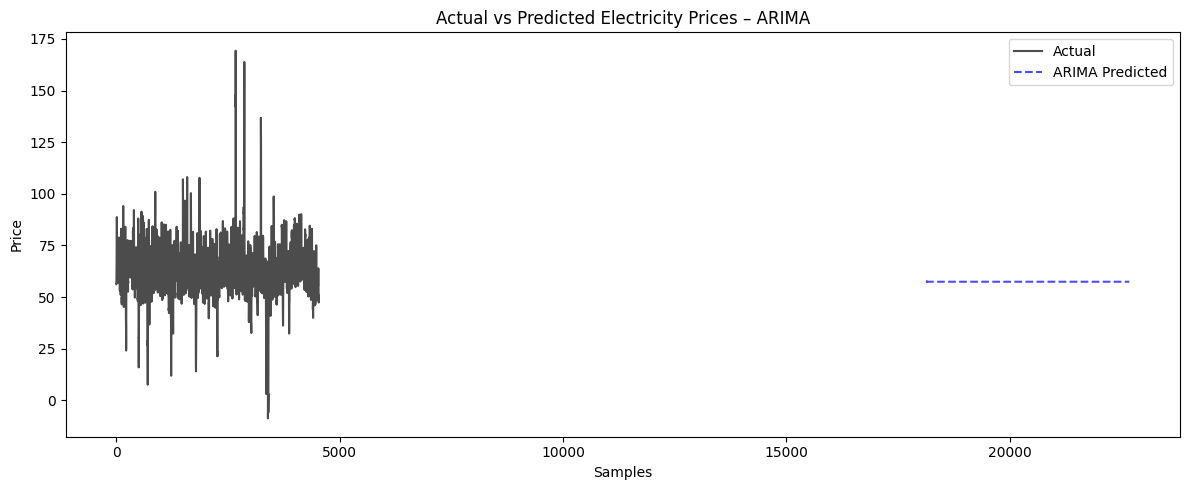

In [19]:
#Plot Actual vs Predicted – ARIMA
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color='black', alpha=0.7)
plt.plot(y_pred_arima, label="ARIMA Predicted", color='blue', linestyle="--", alpha=0.7)
plt.title("Actual vs Predicted Electricity Prices – ARIMA")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()






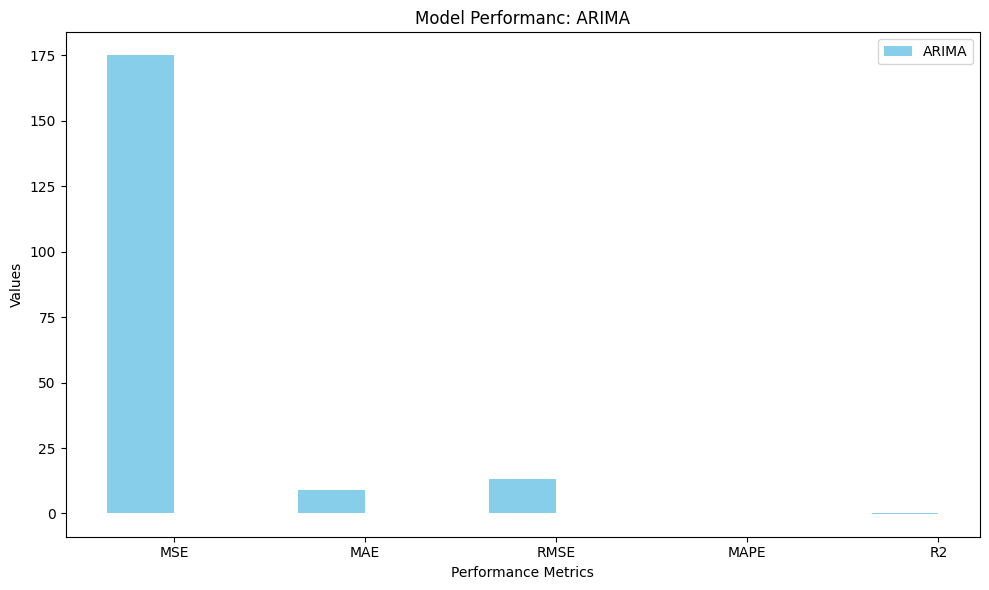

In [20]:
# Metrics for both models
metrics = ['MSE', 'MAE', 'RMSE', 'MAPE', 'R2']
arima_values = [174.96, 8.81, 13.23, 0, -0.12]

x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, arima_values, width, label='ARIMA', color='skyblue')

# Plot settings
plt.xlabel('Performance Metrics')
plt.ylabel('Values')
plt.title('Model Performanc: ARIMA')
plt.xticks(x, metrics)

plt.legend()
plt.tight_layout()
plt.show()
